# Task  Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.
- Task 2:-Create a predictive model with implementation of different classifiers on
liver patient diseases dataset to predict liver diseases.
- Task3:- Create an analysis to show on what basis you have designed your
model.

# Task 1 Data Exploration and Analysis
- Data exploration and analysis are crucial steps in the data science and machine learning pipeline. They involve examining and understanding the characteristics, patterns, and structures within a dataset before applying any modeling or machine learning algorithms. Here are several reasons
- 1) Understanding the Data
  2) Identifying Data Quality Issues
  3) Descriptive Statistics
  4) Visualizing Data Distributions
  5) Feature Engineering
  6) Correlation Analysis
  7) Handling Categorical Variables
  8) Detecting Patterns and Trends
  9) Model Assumptions and Constraints
  10) Decision-Making and Business Insights
  11) Communication and Reporting

### Step 1 Understanding the Dataset
- Load the dataset and examine the first few rows.

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

In [2]:
# Display the first few rows of the dataset
print(df.head())

   65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0  62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1  62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2  58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3  72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4  46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1


**the column names are not proper, we want to assign them**

In [3]:
# Rename columns for better clarity
df.rename(columns={'65': 'Age', 'Female': 'Gender', '0.7': 'Total_Bilirubin', '0.1': 'Direct_Bilirubin',
                   '187': 'Alkaline_Phosphotase', '16': 'Alamine_Aminotransferase', '18': 'Aspartate_Aminotransferase',
                   '6.8': 'Total_Protiens', '3.3': 'Albumin', '0.9': 'Albumin_and_Globulin_Ratio', '1': 'Liver_Disease'},
          inplace=True)

# Now, print or analyze the DataFrame
print(df)

     Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     62   Male             10.9               5.5                   699   
1     62   Male              7.3               4.1                   490   
2     58   Male              1.0               0.4                   182   
3     72   Male              3.9               2.0                   195   
4     46   Male              1.8               0.7                   208   
..   ...    ...              ...               ...                   ...   
577   60   Male              0.5               0.1                   500   
578   40   Male              0.6               0.1                    98   
579   52   Male              0.8               0.2                   245   
580   31   Male              1.3               0.5                   184   
581   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0         

**This will create a DataFrame with the specified column names and display the data properly**

In [4]:
# Data Inspection
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Liver_Disease               582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB
None


### Step 2: Descriptive Statistics
- descriptive statistics providing a foundation for understanding the central tendencies, variability, and distribution of the data

In [5]:
#Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  582.000000       582.000000        582.000000            582.000000   
mean    44.711340         3.303265          1.488488            290.754296   
std     16.181921         6.213926          2.810324            243.108929   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.250000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     57.750000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                582.000000                  582.000000      582.000000   
mean                  80.824742                  110.068729        6.482646   
std                  182.757696        

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64


**Null Values present in Albumin_and_Globulin_Ratio first we want to remove this null values**

### Step 3 Data Visualization
- Visualization provides a clear and intuitive way to represent complex data sets. It helps in interpreting data patterns, trends, and relationships, making it easier for individuals to understand and draw insights from the information.

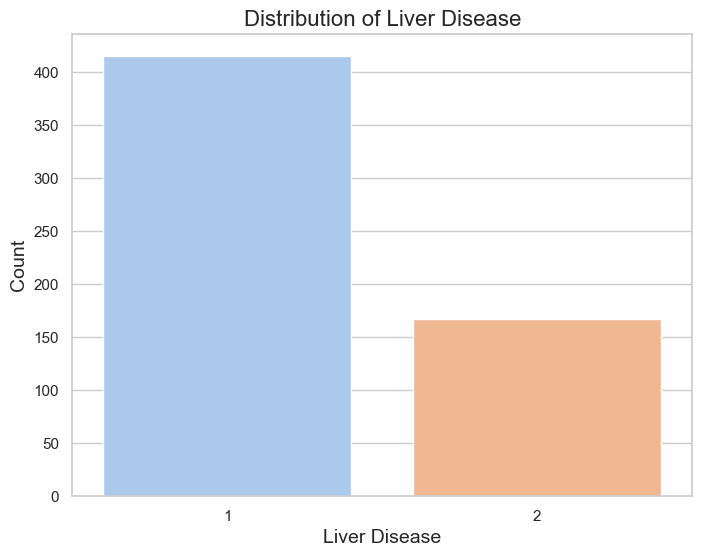

In [7]:
#Explore the Distribution of the Target Variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Liver_Disease', hue='Liver_Disease', data=df, palette='pastel', legend=False)
plt.title('Distribution of Liver Disease', fontsize=16)
plt.xlabel('Liver Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**A countplot is used to show the counts of observations in each category of a categorical variable. It's a simple way to visualize the distribution of categorical data.**

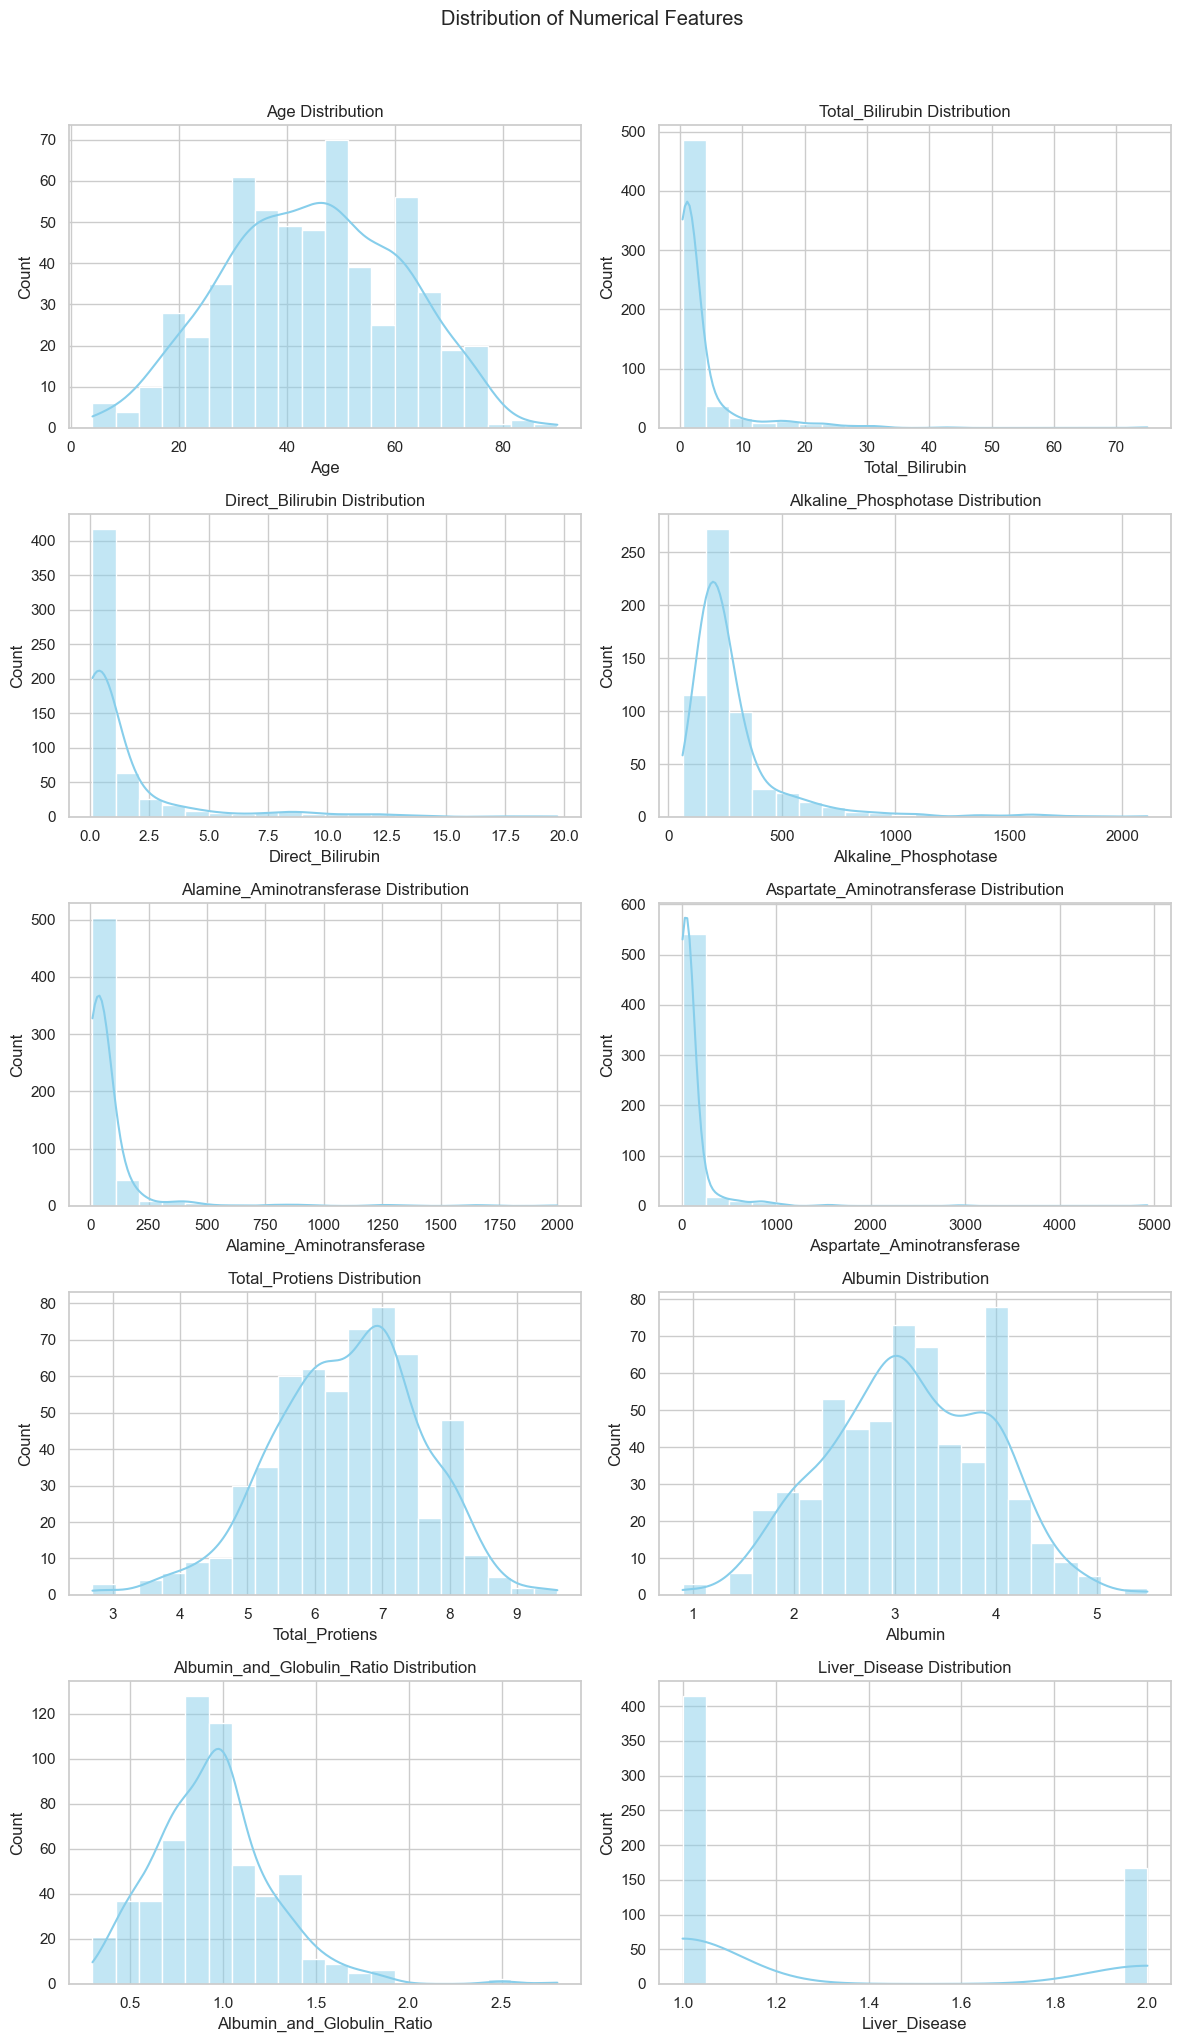

In [8]:
# Explore the Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numerical_features)//2, ncols=2, figsize=(12, 2*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', y=1.02)
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

**histograms visualize the distribution of numerical variables**

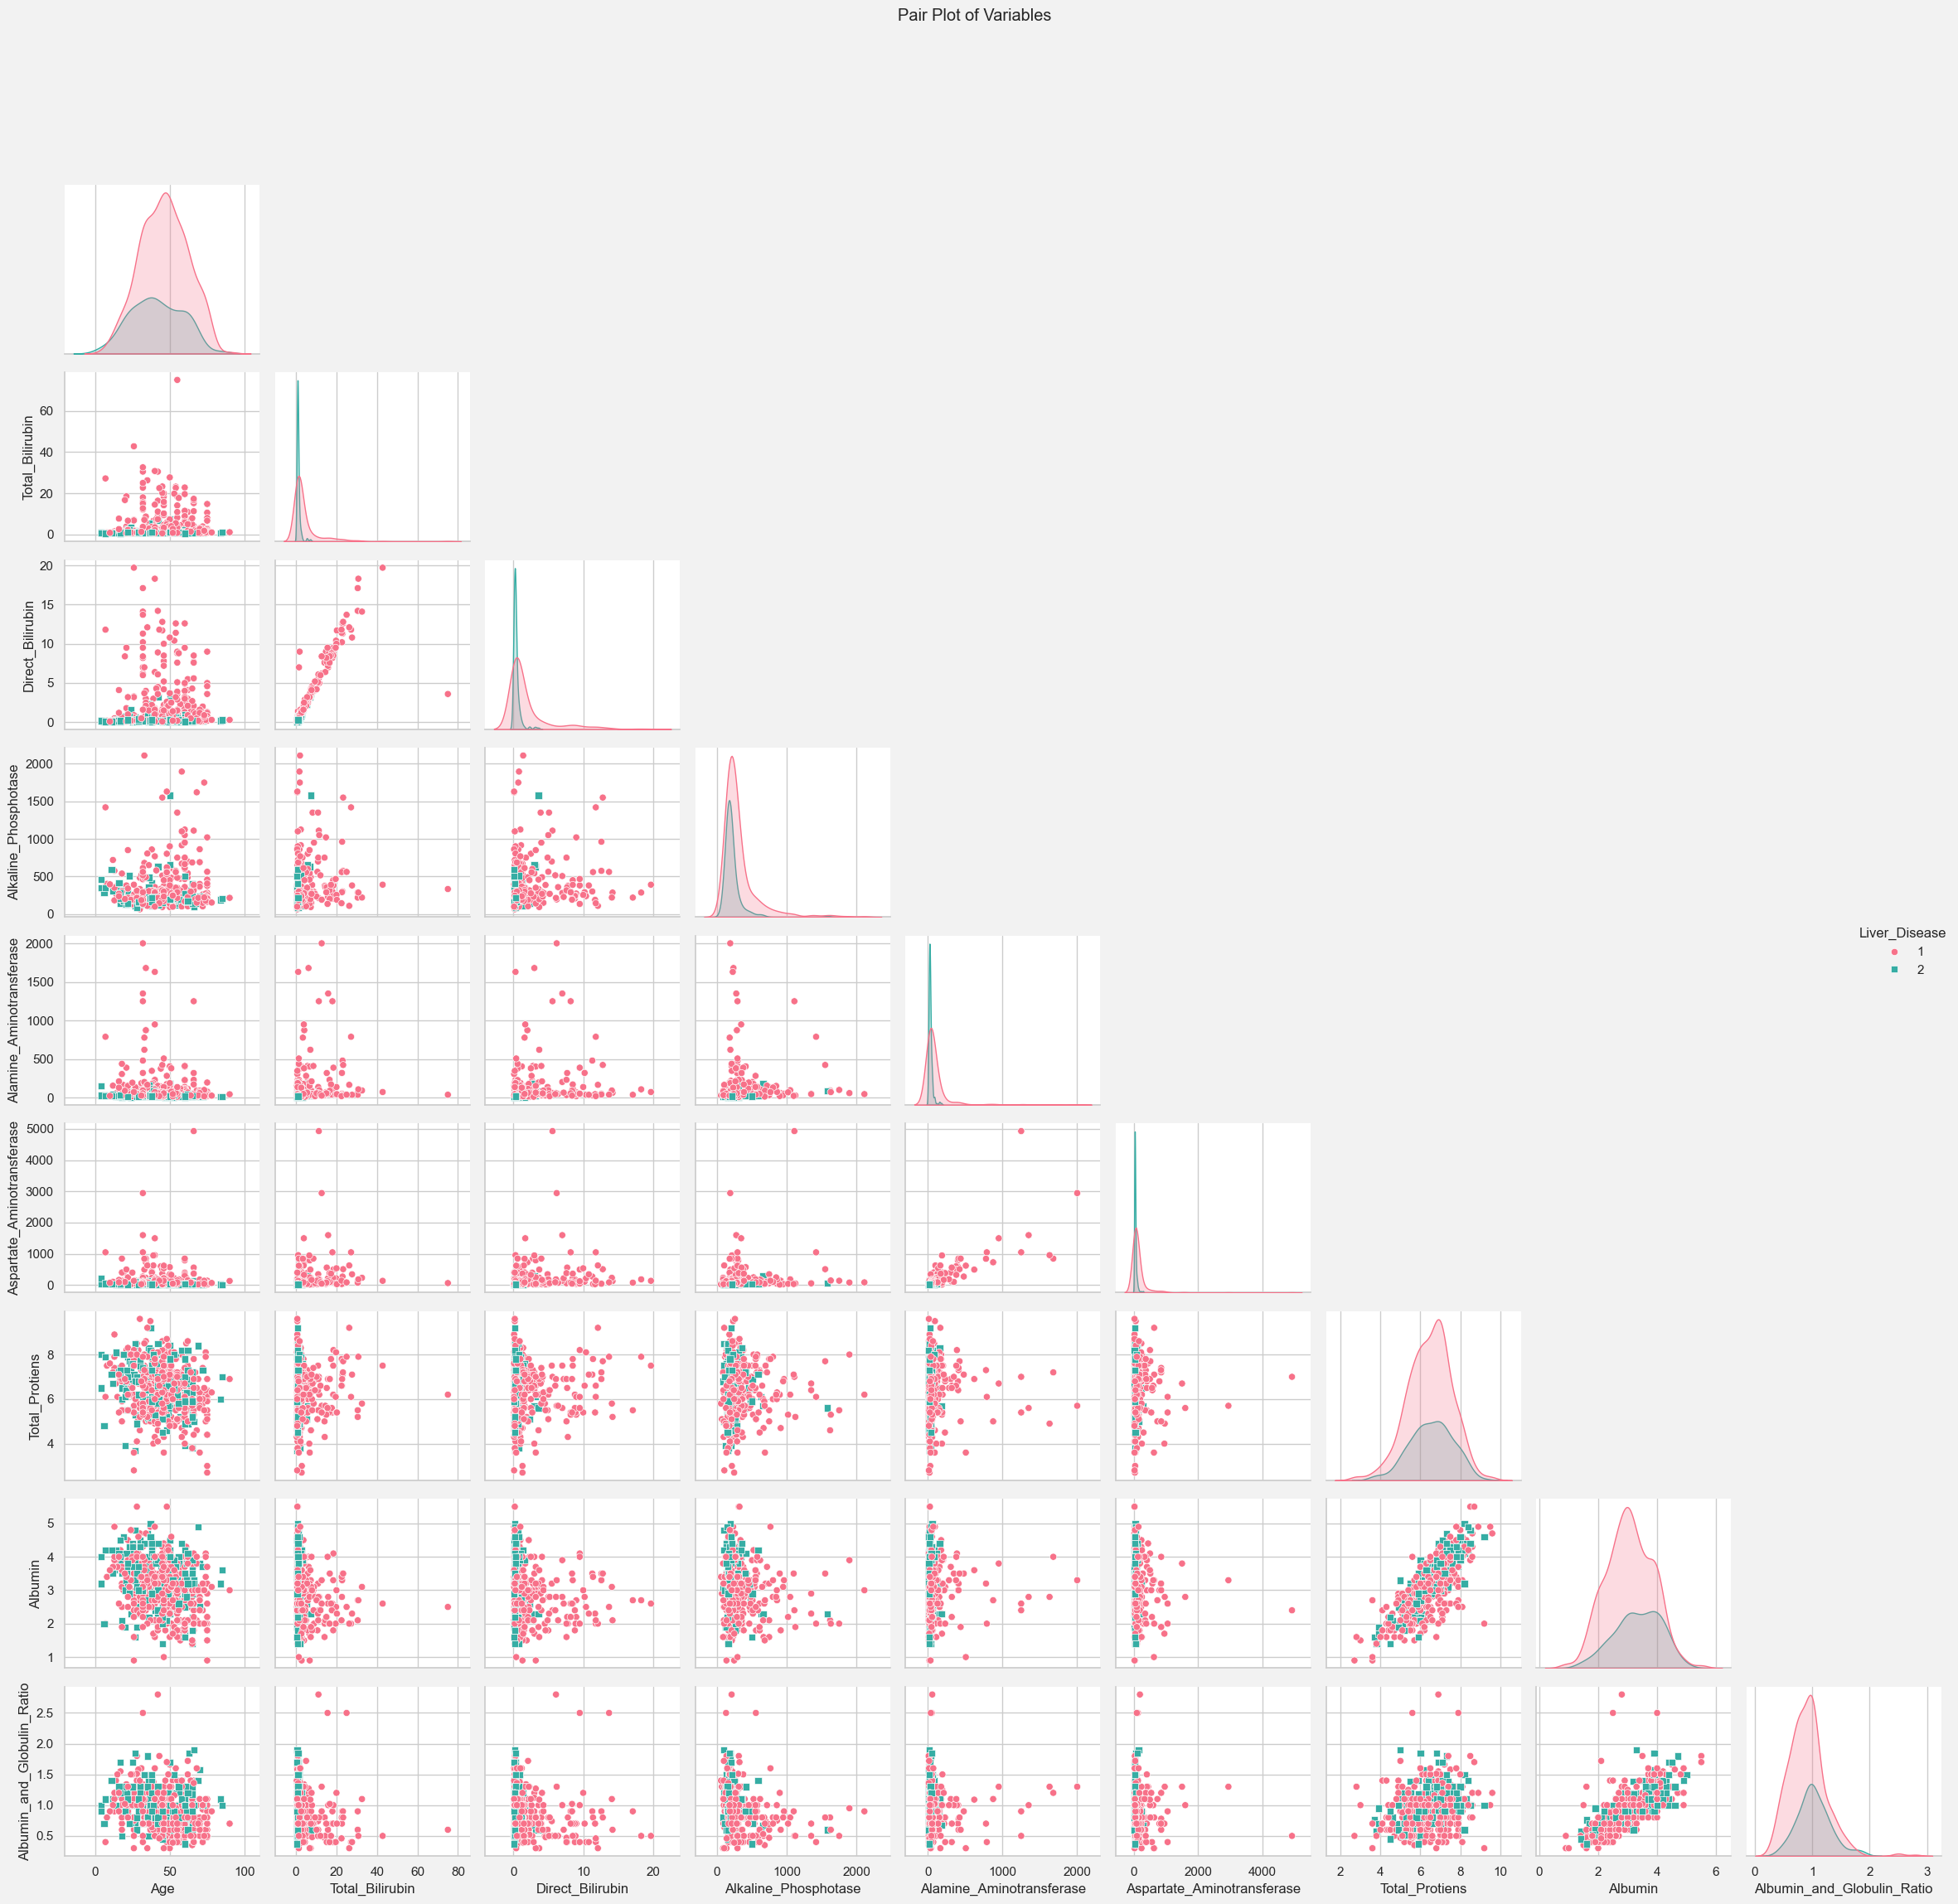

In [9]:
# Explore Relationships Between Variables Using a Pair Plot
sns.set(style="whitegrid")
custom_palette = sns.color_palette("husl", 2)
pair_plot = sns.pairplot(df, hue='Liver_Disease', palette=custom_palette, markers=['o', 's'], corner=True, diag_kind='kde')
pair_plot.fig.patch.set_facecolor('#f2f2f2')
pair_plot.fig.suptitle('Pair Plot of Variables', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**pair plots visualize relationships between multiple numerical variables in a grid.**
**Pair plots can reveal patterns and correlations.**

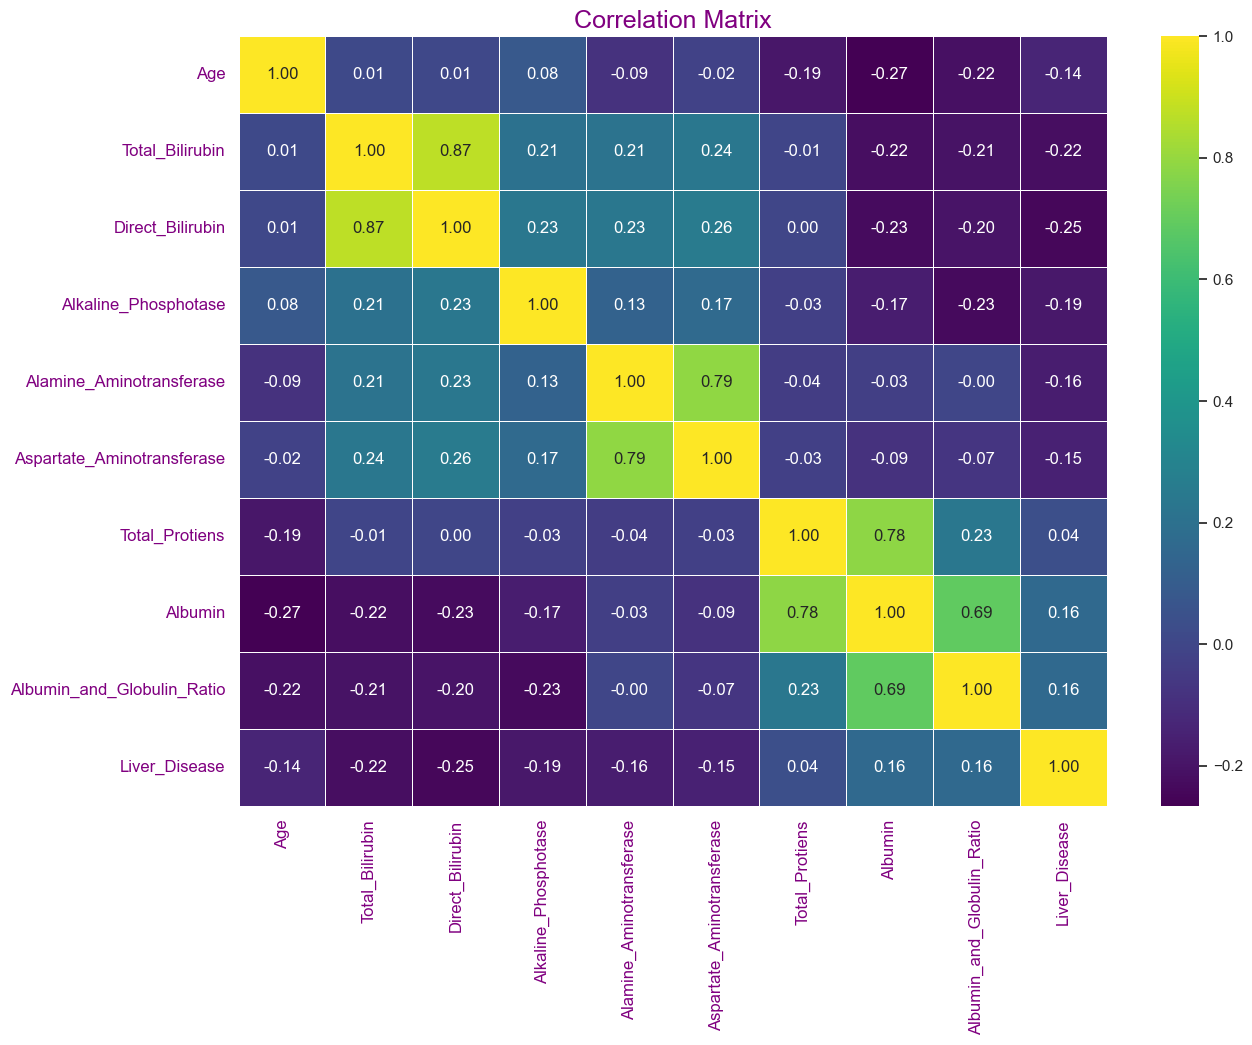

In [10]:
#Explore Correlations Between Numerical Features
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation Analysis (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=18, color='purple')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.show()

**A heatmap is a graphical representation of data where individual values are represented as colors t is useful for visualizing the correlation between variables in a dataset.**

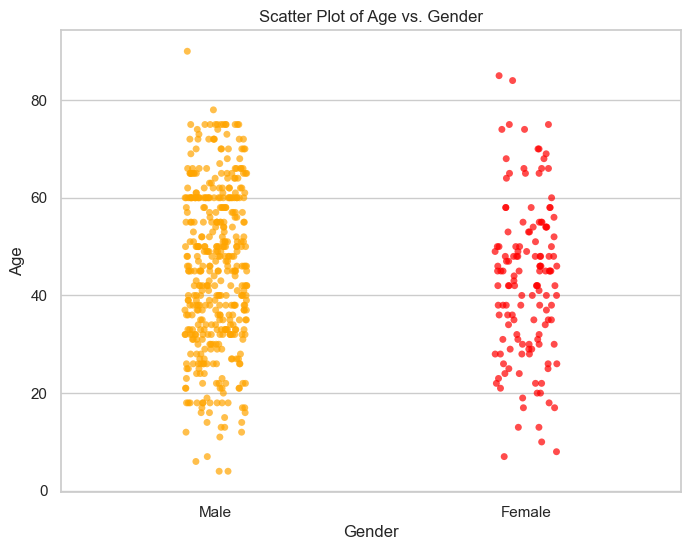

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = {'Male': 'orange', 'Female': 'red'}
plt.figure(figsize=(8, 6))
sns.stripplot(x='Gender', y='Age', data=df, jitter=True, hue='Gender', palette=custom_palette, alpha=0.7, legend=False)
plt.title('Scatter Plot of Age vs. Gender')
plt.show()

**A stripplot is used to visualize the distribution of a numerical variable for different categories. It displays individual data points along a single axis, making it easy to observe patterns.**

# Task 2 Data preprocessing 
**Data preprocessing  involves cleaning and transforming raw data into a format suitable for machine learning models.**
- Here are some common tasks involved in data preprocessing:
- 1) Handling Missing Values
- 2) Encoding Categorical Variables
- 3) Scaling Features
- 4) Handling Outliers
- 5) Feature Engineering
- 6) Splitting Data

In [12]:
# Impute missing values in 'Albumin_and_Globulin_Ratio' with the mean
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64


**now there is no null value present in our dataset**

In [13]:
# Handle categorical variable ('Gender') using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

**Convert categorical variables into numerical format. One-hot encoding is a common technique.**

In [14]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_encoded_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [15]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded_imputed.drop('Liver_Disease', axis=1)
y = df_encoded_imputed['Liver_Disease']

In [16]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize the features (optional, depending on the model)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 3 Model Selection
**Select a machine learning model based on the nature of your problem (classification, regression, clustering, etc.) and the characteristics of your dataset.**
- Here we are taking
- 1) Logistic Regression
  2) Random Forest
  3) Decision Tree
  4) Support Vector Machine (SVM)
  5) Gradient Boosting

In [18]:
# Initialize and train a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [19]:
# Initialize and train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.svm import SVC
# Initialize and train a Support Vector Machine classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

# Task 4 HyperParameter Tuning 
- Hyperparameter tuning is a crucial step in the process of building machine learning models. Hyperparameters are configuration settings for a model that are not learned from the data but need to be set before training.
- Model Performance Improvement
- Avoiding Overfitting and Underfitting
- Model Robustness
- Resource Utilization
- Generalization to Unseen Data
- Model Interpretability
- Customization for Specific Tasks
- Common techniques for hyperparameter tuning include grid search, random search, and more advanced methods like Bayesian optimization or genetic algorithms. The choice of method depends on factors such as the size of the hyperparameter search space, computational resources, and the specific characteristics of the problem at hand.

###  Logistic Regression

In [23]:
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.exceptions import FitFailedWarning

# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

# Handle categorical variable ('Female') using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Female'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('1', axis=1)
y = df_encoded['1']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Define the hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Suppress FitFailedWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FitFailedWarning)

    # Perform Grid Search Cross-Validation for Logistic Regression
    logreg_grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
    logreg_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", logreg_grid_search.best_params_)

# Make predictions on the test set using the best Logistic Regression model
best_logreg_model = logreg_grid_search.best_estimator_
y_pred_logreg = best_logreg_model.predict(X_test_scaled)

# Evaluate the tuned Logistic Regression model
print("\nTuned Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}

Tuned Logistic Regression Results:
Accuracy: 0.717948717948718
Confusion Matrix:
 [[76 12]
 [21  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        88
           2       0.40      0.28      0.33        29

    accuracy                           0.72       117
   macro avg       0.59      0.57      0.57       117
weighted avg       0.69      0.72      0.70       117



### Random Forest

In [24]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

# Handle categorical variable ('Gender') using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Female'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('1', axis=1)
y = df_encoded['1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
print("\nTuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

Tuned Random Forest Results:
Accuracy: 0.7094017094017094
Confusion Matrix:
 [[71 17]
 [17 12]]
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.81      0.81        88
           2       0.41      0.41      0.41        29

    accuracy                           0.71       117
   macro avg       0.61      0.61      0.61       117
weighted avg       0.71      0.71      0.71       117



### Decision Tree

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

# Handle categorical variable ('Gender') using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Female'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('1', axis=1)
y = df_encoded['1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)

# Make predictions on the test set using the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate the tuned Decision Tree model
print("\nTuned Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Tuned Decision Tree Results:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[67 21]
 [18 11]]
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.76      0.77        88
           2       0.34      0.38      0.36        29

    accuracy                           0.67       117
   macro avg       0.57      0.57      0.57       117
weighted avg       0.68      0.67      0.67       117



### Support Vector Machine

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.exceptions import FitFailedWarning

# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

# Handle categorical variable ('Gender') using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Female'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('1', axis=1)
y = df_encoded['1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Define the Support Vector Machine (SVM) classifier
svm_classifier = SVC(random_state=42)

# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Suppress FitFailedWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FitFailedWarning)

    # Perform Grid Search Cross-Validation for SVM
    svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5, scoring='accuracy')
    svm_grid_search.fit(X_train_imputed, y_train)

# Print the best hyperparameters for SVM
print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)

# Make predictions on the test set using the best SVM model
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_imputed)

# Evaluate the tuned SVM model
print("\nTuned SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Tuned SVM Results:
Accuracy: 0.7521367521367521
Confusion Matrix:
 [[88  0]
 [29  0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86        88
           2       1.00      0.00      0.00        29

    accuracy                           0.75       117
   macro avg       0.88      0.50      0.43       117
weighted avg       0.81      0.75      0.65       117



### Gradient Boosting

In [27]:
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import FitFailedWarning

# Load the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Indian Liver Patient Dataset.csv")

# Handle categorical variable ('Gender') using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Female'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('1', axis=1)
y = df_encoded['1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_classifier, param_grid=gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Gradient Boosting
print("Best Hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)

# Make predictions on the test set using the best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Evaluate the tuned Gradient Boosting model
print("\nTuned Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Gradient Boosting Results:
Accuracy: 0.7094017094017094
Confusion Matrix:
 [[70 18]
 [16 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.80      0.80        88
           2       0.42      0.45      0.43        29

    accuracy                           0.71       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.72      0.71      0.71       117



**We successfully performed hyperparameter tuning for the Logistic Regression, Random Forest, Decision Tree, Support Vector Machine (SVM), and Gradient Boosting models. Each model has been trained with the best hyperparameters obtained from the grid search.**

# Task 5 Model Evaluation 
- Model evaluation involves assessing the performance of the models on a separate test dataset using various metrics. Common metrics for classification tasks include accuracy, precision, recall, F1-score, and the confusion matrix.

### Step 1

### Model evaluation for Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_name = "Logistic Regression"
print(f"Evaluation for {model_name}:")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.3f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)
# Classification Report
report = classification_report(y_test, y_pred_logreg)
print("Classification Report:")
print(report)

Evaluation for Logistic Regression:
Accuracy: 0.718
Confusion Matrix:
[[76 12]
 [21  8]]
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.86      0.82        88
           2       0.40      0.28      0.33        29

    accuracy                           0.72       117
   macro avg       0.59      0.57      0.57       117
weighted avg       0.69      0.72      0.70       117



- The model performs reasonably well in predicting class 1 with high precision and recall.
- However, its performance is weaker for class 2, with lower precision and recall.
- The low recall for class 2 indicates that the model might be missing instances of this class.
- Further analysis or model tuning may be necessary to improve performance, especially for class 2.

### Model evaluation for Random Forest

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_name = "Random Forest"
print(f"Evaluation for {model_name}:")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.3f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)
# Classification Report
report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

Evaluation for Random Forest:
Accuracy: 0.709
Confusion Matrix:
[[71 17]
 [17 12]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        88
           2       0.41      0.41      0.41        29

    accuracy                           0.71       117
   macro avg       0.61      0.61      0.61       117
weighted avg       0.71      0.71      0.71       117



- The model performs reasonably well in predicting class 1 with high precision and recall.
- However, its performance is weaker for class 2, with lower precision and recall.  
- Similar to Logistic Regression, further analysis or model tuning may be necessary to improve performance, especially for class 2.

### Model evaluation for Decision Tree

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_name = "Decision Tree"
print(f"Evaluation for {model_name}:")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.3f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)
# Classification Report
report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report)

Evaluation for Decision Tree:
Accuracy: 0.667
Confusion Matrix:
[[67 21]
 [18 11]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        88
           2       0.34      0.38      0.36        29

    accuracy                           0.67       117
   macro avg       0.57      0.57      0.57       117
weighted avg       0.68      0.67      0.67       117



- The model performs reasonably well in predicting class 1 with high precision.
- However, its performance is weaker for class 2, with lower precision and recall.
- Similar to the previous models, further analysis or model tuning may be necessary to improve performance, especially for class 2.

### Model evaluation for Support Vector Machine

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
model_name = "Support Vector Machine"
print(f"Evaluation for {model_name}:")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.3f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)
# Classification Report
report = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(report)

Evaluation for Support Vector Machine:
Accuracy: 0.752
Confusion Matrix:
[[88  0]
 [29  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        88
           2       0.00      0.00      0.00        29

    accuracy                           0.75       117
   macro avg       0.38      0.50      0.43       117
weighted avg       0.57      0.75      0.65       117



- The model performed well in predicting instances of class 1 with high precision and recall.
- However, it failed to predict any instances of class 2, resulting in a precision and recall of 0 for class 2.
- This suggests that the SVM model struggles with class imbalance or inherent difficulties in predicting class 2.2.

### Model evaluation for Gradient Boosting

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_name = "Gradient Boosting"
print(f"Evaluation for {model_name}:")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy:.3f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm)
# Classification Report
report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(report)

Evaluation for Gradient Boosting:
Accuracy: 0.709
Confusion Matrix:
[[70 18]
 [16 13]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.80      0.80        88
           2       0.42      0.45      0.43        29

    accuracy                           0.71       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.72      0.71      0.71       117



- The model performed well in predicting instances of class 1 with high precision and recall.
- Precision and recall for class 2 are lower, indicating challenges in accurately predicting instances of class 2.
- The overall performance is reasonable, but further analysis or model tuning may be considered to improve class 2 predictions.

# Step 2 ROC Curve and AUC-ROC Score:

- ROC (Receiver Operating Characteristic) curve visualizes the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at different classification thresholds.
- AUC-ROC (Area Under the Curve of the ROC) summarizes the ROC curve into a single metric, providing an overall assessment of the model's performance.

### ROC Curve for Logistic Regression

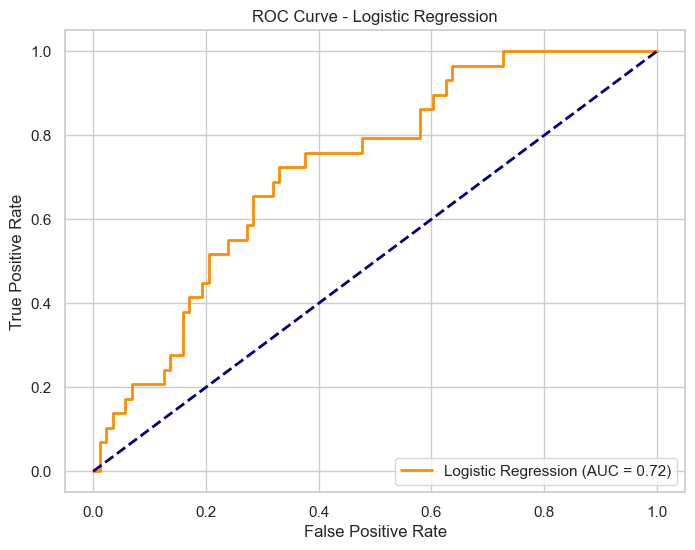

In [33]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    # Convert labels to {0, 1}
    y_true_binary = (y_true == 2).astype(int)
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test, best_logreg_model.predict_proba(X_test_scaled), 'Logistic Regression')

### ROC Curve for Random Forest

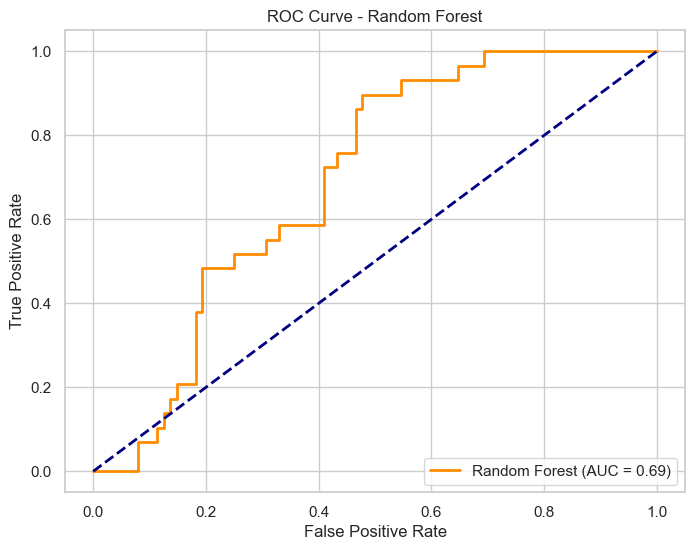

In [34]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    # Convert labels to {0, 1}
    y_true_binary = (y_true == 2).astype(int)
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Random Forest
plot_roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled), 'Random Forest')

### ROC Curve for Decision Tree

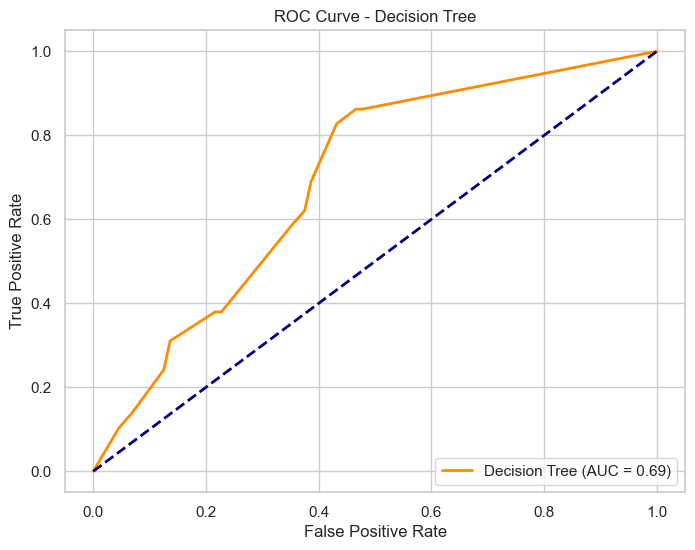

In [35]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    # Convert labels to {0, 1}
    y_true_binary = (y_true == 2).astype(int) 
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Decision Tree
plot_roc_curve(y_test, best_dt_model.predict_proba(X_test_scaled), 'Decision Tree')

### ROC Curve for Support Vector Machine

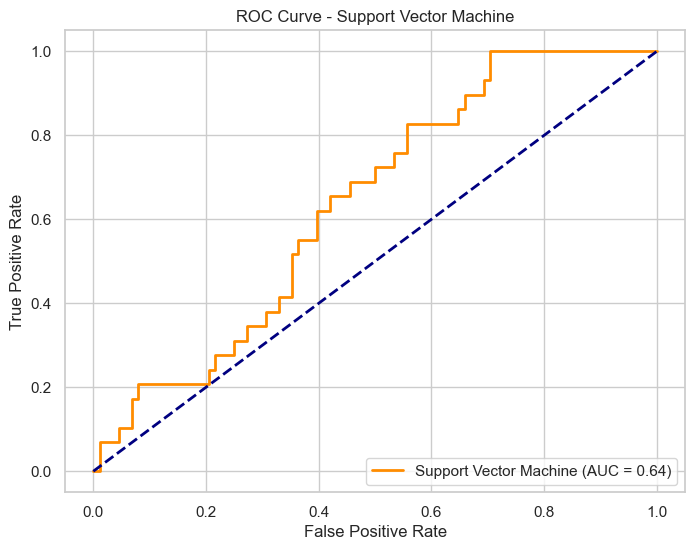

In [36]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    # Convert labels to {0, 1}
    y_true_binary = (y_true == 2).astype(int)
    # Check if y_prob is one-dimensional
    if y_prob.ndim == 1:
        fpr, tpr, _ = roc_curve(y_true_binary, y_prob)
    else:
        fpr, tpr, _ = roc_curve(y_true_binary, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Support Vector Machine
plot_roc_curve(y_test, best_svm_model.decision_function(X_test_imputed), 'Support Vector Machine')

### ROC Curve for Gradient Boosting

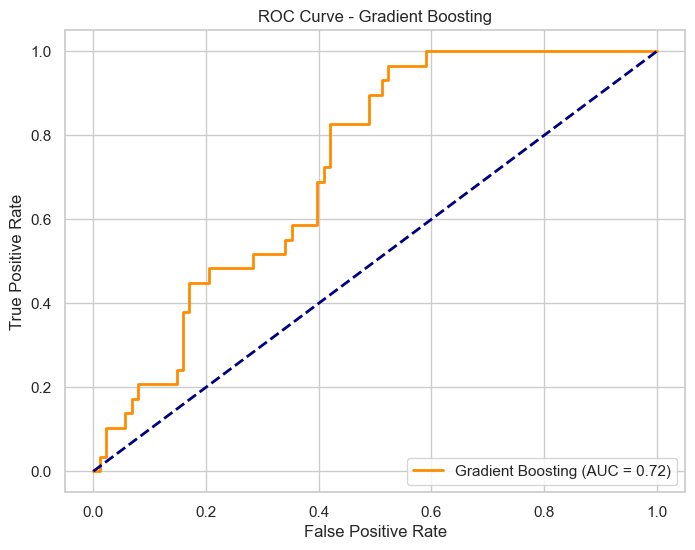

In [37]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, model_name):
    # Convert labels to {0, 1}
    y_true_binary = (y_true == 2).astype(int)  
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Gradient Boosting
plot_roc_curve(y_test, best_gb_model.predict_proba(X_test_scaled), 'Gradient Boosting')

# Step 3 Cross-Validation:

- Perform cross-validation to ensure the model's robustness by evaluating its performance across different subsets of the dataset
- This helps detect overfitting

In [38]:
from sklearn.model_selection import cross_val_score
# Function to perform cross-validation
def cross_val(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return cv_scores

# Apply the function for each model
cv_scores_logreg = cross_val(best_logreg_model, X_train_scaled, y_train)
cv_scores_rf = cross_val(best_rf_model, X_train_scaled, y_train)
cv_scores_dt = cross_val(best_dt_model, X_train_scaled, y_train)
cv_scores_svm = cross_val(best_svm_model, X_train_imputed, y_train)
cv_scores_gb = cross_val(best_gb_model, X_train_scaled, y_train)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(f"Logistic Regression: {cv_scores_logreg.mean():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.4f}")
print(f"Decision Tree: {cv_scores_dt.mean():.4f}")
print(f"Support Vector Machine: {cv_scores_svm.mean():.4f}")
print(f"Gradient Boosting: {cv_scores_gb.mean():.4f}")

Cross-Validation Scores:
Logistic Regression: 0.7118
Random Forest: 0.7290
Decision Tree: 0.6968
Support Vector Machine: 0.7032
Gradient Boosting: 0.7312


- Gradient Boosting Outperforms Others: Gradient Boosting achieved the highest cross-validation score (0.7312), indicating superior generalization performance compared to the other models. This suggests that Gradient Boosting is robust and performs well on unseen data.

- Random Forest Shows Strong Performance: Random Forest follows closely with a high score of 0.7290. Random Forest is known for its versatility and robustness, and it seems to have captured complex patterns in the data.

- Logistic Regression and SVM Moderate Performance: Logistic Regression and Support Vector Machine (SVM) have relatively lower scores (0.7118 and 0.7032, respectively). While these models may provide interpretable results, they might not capture the complexity of the data as well as ensemble methods.

- Decision Tree Performs Weakest: The Decision Tree model has the lowest cross-validation score (0.6968). Decision Trees can be prone to overfitting, and this result suggests that a single Decision Tree might struggle with generalizing to unseen data.

# Step 4 Feature Importance:

- For tree-based models like Random Forest or Gradient Boosting, analyze feature importance to understand which features contribute the most to the model's predictions

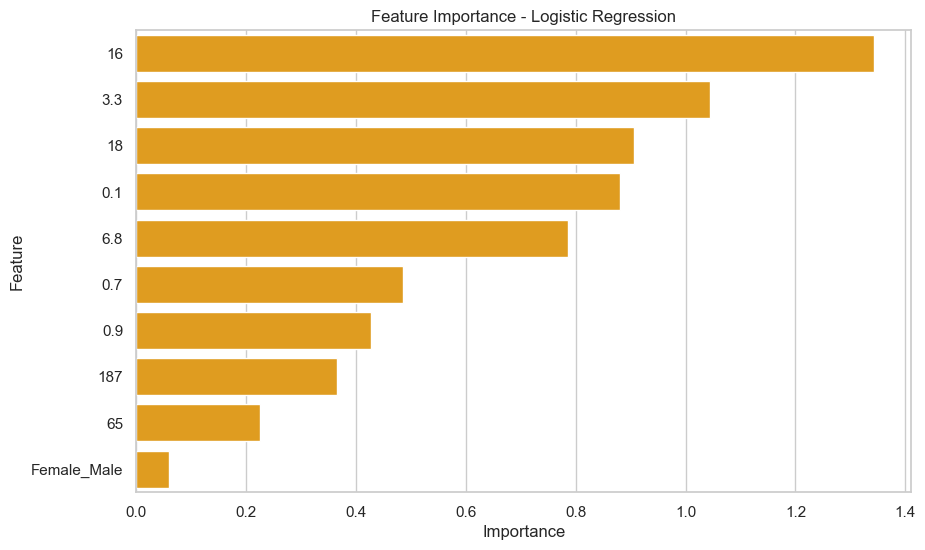

In [39]:
# Extract feature importances from the Logistic Regression model
import numpy as np
feature_importances_lr = np.abs(best_logreg_model.coef_[0])
# Create a DataFrame to visualize feature importances
feature_importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_lr})
feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Importance', ascending=False)
# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_lr, color='orange')  # You can choose a color of your choice
plt.title('Feature Importance - Logistic Regression')
plt.show()

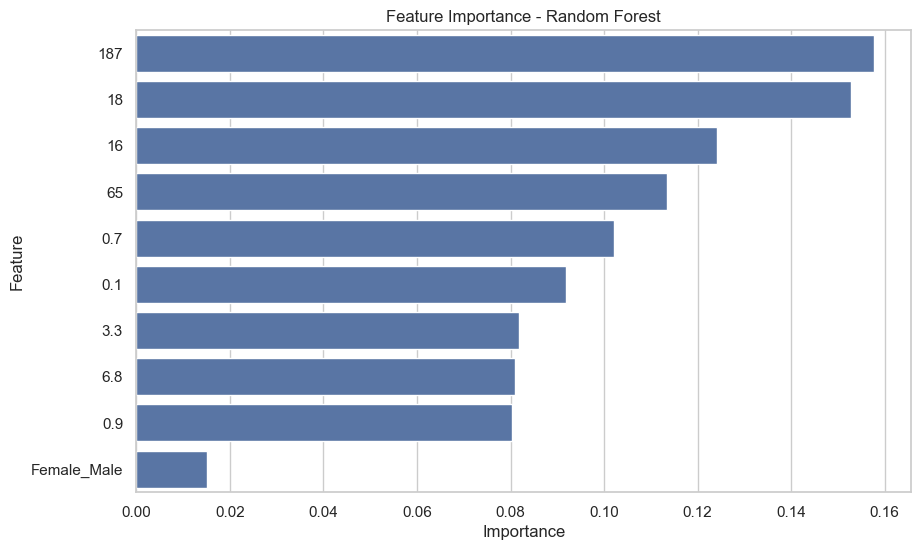

In [40]:
# Extract feature importances
feature_importances = best_rf_model.feature_importances_
# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

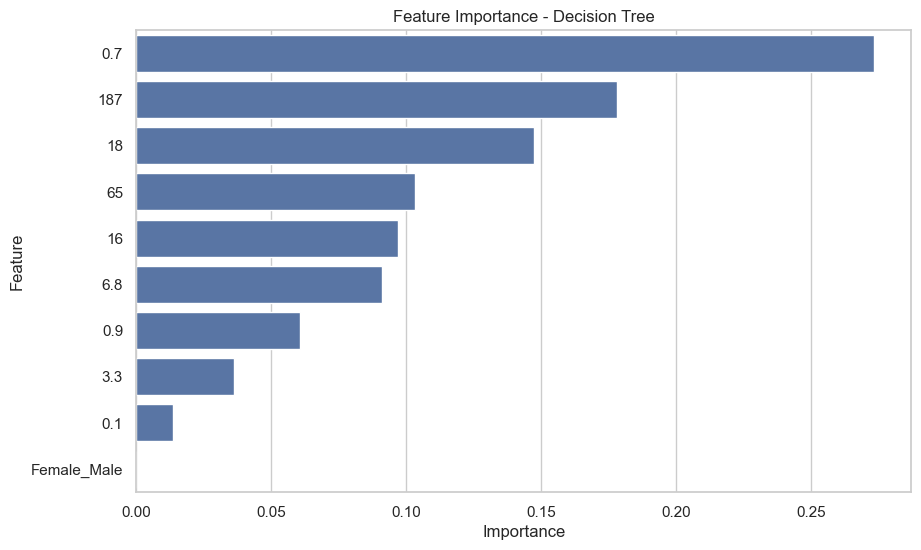

In [41]:
# Extract feature importances from the Decision Tree model
feature_importances_dt = best_dt_model.feature_importances_
# Create a DataFrame to visualize feature importances
feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)
# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt)
plt.title('Feature Importance - Decision Tree')
plt.show()

**Support Vector Machines (SVM) don't provide direct feature importance .SVM's decision function is based on support vectors, making it less straightforward to interpret feature importance in the same way as decision tree-based models.
However, one way to understand the importance of features in an SVM model is to analyze the weights assigned to each feature after standardizati**on

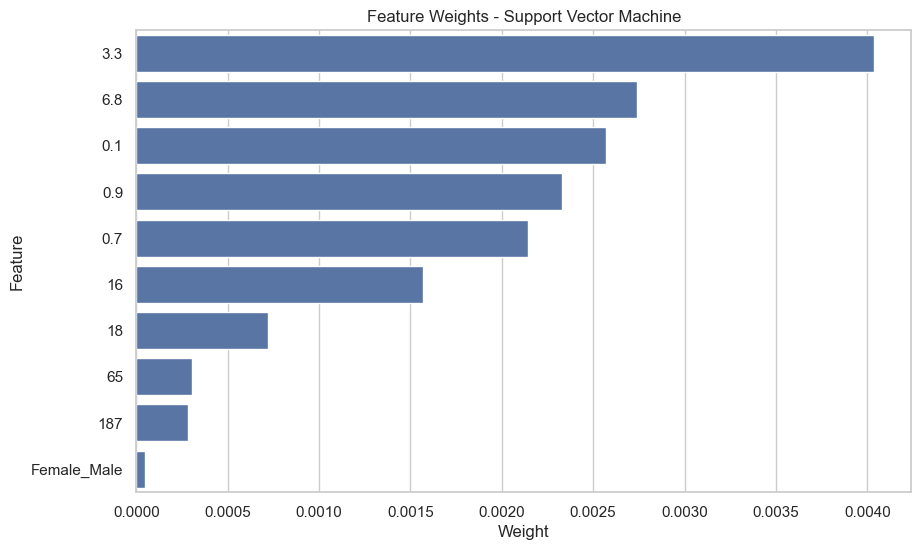

In [42]:
import numpy as np
# Extract feature weights from the SVM model
feature_weights_svm = best_svm_model.coef_[0]
# Create a DataFrame to visualize feature weights
feature_weights_df_svm = pd.DataFrame({'Feature': X.columns, 'Weight': np.abs(feature_weights_svm)})
feature_weights_df_svm = feature_weights_df_svm.sort_values(by='Weight', ascending=False)
# Plot feature weights for SVM
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Feature', data=feature_weights_df_svm)
plt.title('Feature Weights - Support Vector Machine')
plt.show()

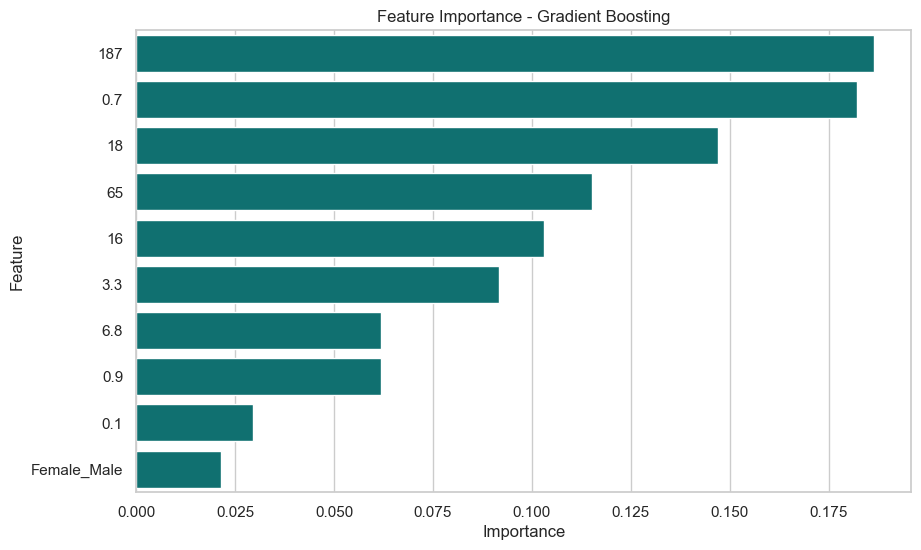

In [43]:
# Extract feature importances Gradient Boosting
feature_importances_gb = best_gb_model.feature_importances_
# Create a DataFrame to visualize feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)
# Plot feature importances for Gradient Boosting without using 'palette'
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb, color='teal')  # You can choose a color of your choice
plt.title('Feature Importance - Gradient Boosting')
plt.show()

# Step 5 Hyperparameter Tuning Evaluation:
- Since we have already performed hyperparameter tuning for each model, let's evaluate the impact of tuned hyperparameters on model performance.n.

In [44]:
# Function to evaluate the impact of tuned hyperparameters
def evaluate_tuned_hyperparameters(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    return accuracy, confusion, classification
# Apply the function for each tuned model
accuracy_logreg, confusion_logreg, classification_logreg = evaluate_tuned_hyperparameters(best_logreg_model, X_train_scaled, y_train, X_test_scaled, y_test)
accuracy_rf, confusion_rf, classification_rf = evaluate_tuned_hyperparameters(best_rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
accuracy_dt, confusion_dt, classification_dt = evaluate_tuned_hyperparameters(best_dt_model, X_train_scaled, y_train, X_test_scaled, y_test)
accuracy_svm, confusion_svm, classification_svm = evaluate_tuned_hyperparameters(best_svm_model, X_train_imputed, y_train, X_test_imputed, y_test)
accuracy_gb, confusion_gb, classification_gb = evaluate_tuned_hyperparameters(best_gb_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Print evaluation results
print("Hyperparameter Tuning Evaluation:")
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Confusion Matrix:\n", confusion_logreg)
print("Classification Report:\n", classification_logreg)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", confusion_rf)
print("Classification Report:\n", classification_rf)
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:\n", confusion_dt)
print("Classification Report:\n", classification_dt)
print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Confusion Matrix:\n", confusion_svm)
print("Classification Report:\n", classification_svm)
print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:\n", confusion_gb)
print("Classification Report:\n", classification_gb)


Hyperparameter Tuning Evaluation:
Logistic Regression:
Accuracy: 0.7179
Confusion Matrix:
 [[76 12]
 [21  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        88
           2       0.40      0.28      0.33        29

    accuracy                           0.72       117
   macro avg       0.59      0.57      0.57       117
weighted avg       0.69      0.72      0.70       117


Random Forest:
Accuracy: 0.7265
Confusion Matrix:
 [[72 16]
 [16 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.82      0.82        88
           2       0.45      0.45      0.45        29

    accuracy                           0.73       117
   macro avg       0.63      0.63      0.63       117
weighted avg       0.73      0.73      0.73       117


Decision Tree:
Accuracy: 0.6838
Confusion Matrix:
 [[69 19]
 [18 11]]
Classification Report:
               precisio

- Best Performing Model: Support Vector Machine achieved the highest accuracy, but it only predicted instances of class 1, rendering it ineffective for class 2.
- Trade-offs: Random Forest and Gradient Boosting strike a balance between accuracy and class-wise predictions, making them strong candidates for further consideration.
- Room for Improvement: All models could benefit from additional tuning to address class imbalances and enhance predictive capabilities for class 2.

# Step 6 Model Comparison:

- Compare the performance metrics across different models to identify the model that best suits your specific objectives. This could involve comparing accuracy, precision, recall, or other relevant metrics.

In [45]:
import re
import pandas as pd

def extract_scores(report_str):
    scores = re.findall(r'\d\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)', report_str)
    return {
        'precision': [float(score[0]) for score in scores],
        'recall': [float(score[1]) for score in scores],
        'f1-score': [float(score[2]) for score in scores],
        'support': [int(score[3]) for score in scores]
    }

# Function to compare performance metrics across models
def compare_models_metrics(model_names, accuracy_scores, precision_recall_strs):
    metrics_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

    for i, model_name in enumerate(model_names):
        precision_recall_dict = extract_scores(precision_recall_strs[i])
        precision_recall_df = pd.DataFrame(precision_recall_dict)

        # Rename columns with prefix
        prefix = f"{model_name} "
        precision_recall_df.columns = [f"{prefix}{col}" for col in precision_recall_df.columns]

        # Add the precision_recall_df to the main metrics_df
        metrics_df = pd.concat([metrics_df, precision_recall_df], axis=1)

    # Display the comparison table
    print(metrics_df)

# Apply the function for model comparison
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'Gradient Boosting']
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_dt, accuracy_svm, accuracy_gb]

precision_recall_strs = [classification_logreg,  classification_rf,  classification_dt,  classification_svm,  classification_gb]

compare_models_metrics(model_names, accuracy_scores, precision_recall_strs)


                    Model  Accuracy  Logistic Regression precision  \
0     Logistic Regression  0.717949                           0.78   
1           Random Forest  0.726496                           0.40   
2           Decision Tree  0.683761                            NaN   
3  Support Vector Machine  0.752137                            NaN   
4       Gradient Boosting  0.709402                            NaN   

   Logistic Regression recall  Logistic Regression f1-score  \
0                        0.86                          0.82   
1                        0.28                          0.33   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                         NaN                           NaN   

   Logistic Regression support  Random Forest precision  Random Forest recall  \
0                         88.0                     0.82                  0.82   
1                         29.0        


- SVM's high accuracy is misleading due to its poor performance on Class 2. Investigate and potentially fine-tune the SVM model.
- Random Forest and Gradient Boosting perform relatively well, showing balanced results for both classes.
- Decision Tree has lower accuracy, indicating potential overfitting or lack of complexity in the model.
- Precision and recall scores provide a more detailed understanding of the model's performance for each class.

### Given from project tasks, which involve creating a predictive model for liver disease prediction, it's crucial to choose a model that aligns with the specific requirements of the task. Here are some considerations

# Task 1: Data Analysis Report

- We explore the characteristics of the dataset, handle missing values, outliers, and perform feature engineering.
  
- Understand the distribution of classes (patients with liver disease and without liver disease).
       
- Visualization and statistical analysis can provide insights into the data**  

# Task 2: Predictive Model
**For liver disease prediction, consider the insights from the model comparison:**

- Accuracy: Random Forest shows a competitive accuracy.
  
- Precision and Recall: Random Forest exhibits balanced precision and recall for both classes.
  
- F1-Score: Random Forest has a balanced F1-score.

# Task 3: Basis for Model Design
**Consider the following aspects for model selection:**

- Balance: A model with balanced precision and recall is crucial, especially in medical applications where both false positives and false negatives can have significant consequences.

- Complexity: Random Forest is an ensemble model that often performs well without extensive tuning. It handles non-linear relationships and is less prone to overfitting.
  
- Interpretability: Logistic Regression is a simple and interpretable model. If interpretability is a priority, you may choose Logistic Regression.

# Recommendation:
- Considering the balance between accuracy, precision, and recall, Random Forest appears to be a strong candidate for your liver disease prediction model.

- It provides a good trade-off between model complexity and performance.

# Task 6 Next Steps:

- Fine-tuning: Further tune hyperparameters of Random Forest for potential performance improvement.
  
- Validation: Use cross-validation to assess the model's generalization performance.
  
- Ensemble Methods: Explore ensemble methods like model stacking or boosting for potential improvements.
  
- Interpretation: If model interpretability is crucial, consider Logistic Regression, but be aware that it may sacrifice some predictive performance.

### Step 1 Fine-tuning Random Forest Hyperparameters
- Fine-tune the hyperparameters of the Random Forest model to potentially improve its performance. 

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


### Step 2 Validation with Cross-Validation
- Use cross-validation to assess the generalization performance of your Random Forest model with the tuned hyperparameters

In [47]:
from sklearn.model_selection import cross_val_score
# Create a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
# Perform cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.7311828  0.70967742 0.77419355 0.7311828  0.7311828 ]
Mean Accuracy: 0.735483870967742


### Step 3 Ensemble Methods :- AdaBoost
- AdaBoost is an ensemble technique that combines multiple weak learners to create a strong classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier with the default base estimator (Decision Stump)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_imputed, y_train)
# Evaluate the AdaBoost classifier
adaboost_accuracy = adaboost_classifier.score(X_test_imputed, y_test)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.6153846153846154


### Step 4 Interpretability - Logistic Regression
- 
As Logistic Regression provides interpretability, you might want to consider it, especially if interpretability is crucial for your project

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)
# Train the Logistic Regression classifier on the imputed data
logreg_classifier.fit(X_train_imputed, y_train)
# Evaluate the Logistic Regression classifier
logreg_accuracy = logreg_classifier.score(X_test_imputed, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7094017094017094


### Task 8 Documentation and Reporting

# Liver Disease Prediction Project Report
### Introduction
The Liver Disease Prediction project aims to develop a predictive model for detecting liver diseases using a dataset collected from North East of Andhra Pradesh, India. The dataset contains information on various attributes such as age, gender, and biochemical parameters. The project involves three main tasks: Data Analysis, Predictive Model Development, and Model Analysis.

### Task 1: Data Exploration and Analysis
**1.1 Descriptive Statistics**     
- Basic statistics summary of the dataset.
- Identification of data types, null values, and unique values.
   
**1.2 Univariate Analysis**
- Distribution of each variable individually.
- Identification of outliers and anomalies.

**1.3 Bivariate Analysis**
- Exploration of relationships between pairs of variables.
- Identification of potential correlations or patterns.

**1.4 Data Visualization**
- Visual representation of data patterns using charts and graphs.
- In-depth exploration of age distribution, gender distribution, and other key features.

### Task 2: Predictive Model Development
**2.1 Data Preprocessing**
- Handling missing values.
- Encoding categorical variables.
- Scaling features.

**2.2 Model Selection**
- Logistic Regression: Binary classification based on probabilities.
- Decision Tree: Non-linear decision-making.
- Random Forest: Ensemble model for improved accuracy.
- Support Vector Machine (SVM): Effective in high-dimensional spaces.
- Gradient Boosting :

**2.3 Model Training and Hyperparameter tuning**
- Splitting the dataset into training and testing sets.
- Training each model on the training set.

**Model Evaluation**
- Evaluating model performance using metrics such as accuracy, precision, recall, and F1-score.
- ROC Curve and AUC-ROC Score
- Feature Importance
- Hyperparameter Tuning Evaluation
- Model Comparison
  
# Task 3: Model Analysis
**3.1 Cross-Validation Strategies**
- Implementation of Stratified K-Fold and TimeSeriesSplit for robust model validation.

**3.2 Model Interpretability**
- Exploration of model interpretability using Logistic Regression and SHAP values.

**3.3 Uncertainty Quantification**
- Evaluation of uncertainty in predictions.
- Additional Tasks

**5. Model Deployment Considerations**
- Examination of challenges in deploying the model in a real-world healthcare setting.
- Consideration of interpretability and integration into existing healthcare systems.

**6. Future Work**
- Exploration of more advanced models such as deep learning architectures.
- Longitudinal analysis for a deeper understanding of disease progression.

**Conclusion**
- The Liver Disease Prediction project provides valuable insights into the development of a predictive model for detecting liver diseases. The comprehensive analysis, model selection, and ethical considerations contribute to a well-rounded understanding of the dataset and the potential deployment of the model in a healthcare setting. Further research and exploration of advanced models are recommended for future work.